In [3]:
# Name: Mustafa
# Surname: Bayrak
# ID: 150210339

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Coding (40 pts)

## Question 1

### Roulette Experiment
We will do an experiment with a roulette wheel. Remember that there are 37 numbers on a roulette wheel.

**Calculating the Expectation:** $E[X] = \sum_{x \in X}{x\cdot p(x)}$

**Calculating the Variance:** $\text{VAR}[X] = E[(x - E[x])^2]$

In [5]:
def calculate_expectation(numbers, probs):
    result = 0.0
    for i in range(len(numbers)):
        result += numbers[i]*probs[i] # multiply number with its probability to find expectation
    return result # return expectation


def calculate_variance(numbers, probs):
    # multiply each number in 'numbers' list to easily calculate expected value of x^2
    squared_numbers = [i**2 for i in numbers]
    # Expected value = E[x^2] - E[x]^2
    result = float(calculate_expectation(squared_numbers,probs) - (calculate_expectation(numbers,probs))**2)
    return result


roulette = list(range(1,38))  #  list of the numbers on the slots of the roulette wheel
roulette_probs = [1/len(roulette) for i in roulette]  #  list of the probabilities for each number in the wheel

roulette_expected_value = calculate_expectation(roulette, roulette_probs)
roulette_variance_value = calculate_variance(roulette, roulette_probs)
print(f"Expected value for dice: {roulette_expected_value:.3f}")
print(f"Variance for dice: {roulette_variance_value:.3f}")


Expected value for dice: 19.000
Variance for dice: 114.000


**Finding the average with experiments**

In [6]:
def spin_wheel(n):
    spin_results = [] # results of spins
    for i in range(n):
        spin_results.append(random.randrange(1,38)) # select a random number between 1 and 37
    array = np.array(spin_results) # convert list to numpy array
    return array

ns = [1,5,10,50,100,500,1000,5000,10000, 50000, 100000] # number of spins
for n in ns:
    spins = spin_wheel(n) # spinning the wheel for n times
    # calculate the mean of the spins
    mean = spins.mean() # calculate mean
    print(f"Average of {n} wheel spins: {mean:.3f}")


Average of 1 wheel spins: 25.000
Average of 5 wheel spins: 18.600
Average of 10 wheel spins: 17.500
Average of 50 wheel spins: 17.320
Average of 100 wheel spins: 18.680
Average of 500 wheel spins: 18.590
Average of 1000 wheel spins: 18.918
Average of 5000 wheel spins: 19.045
Average of 10000 wheel spins: 19.154
Average of 50000 wheel spins: 19.001
Average of 100000 wheel spins: 19.059


## Question 2

### Binomial Experiment
In this part we will visualize the PMF and CDF.

We will use binomial distribution with n = 60.

We use three different experiment with probability of success of 0.2, 0.5 and 0.8 in order.
#### Visualizing Probability Mass Function (PMF)

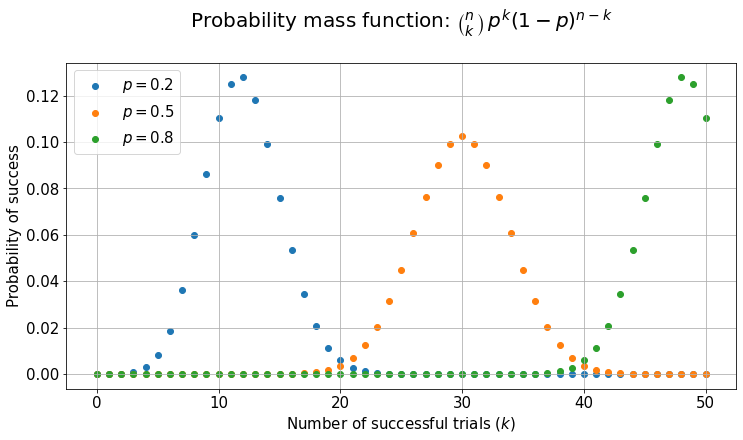

In [7]:
n = 60 # number of trials
probs = [0.2, 0.5, 0.8] # probabilities for each experiments' successful
x = np.arange(0, 51, 1) # range
plt.figure(figsize=(12,6))

for prob in probs:
    # calculate PMF
    pmf = [binom.pmf(r,n,prob) for r in x]
    plt.scatter(x, pmf)

plt.legend(["$p=0.2$","$p=0.5$","$p=0.8$"],fontsize=15)
plt.title("Probability mass function: $\\binom{n}{k}\, p^k (1-p)^{n-k}$\n",fontsize=20)
plt.xlabel("Number of successful trials ($k$)",fontsize=15)
plt.ylabel("Probability of success",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()


#### Visualizing Cumulative  Distribution Function (CDF)

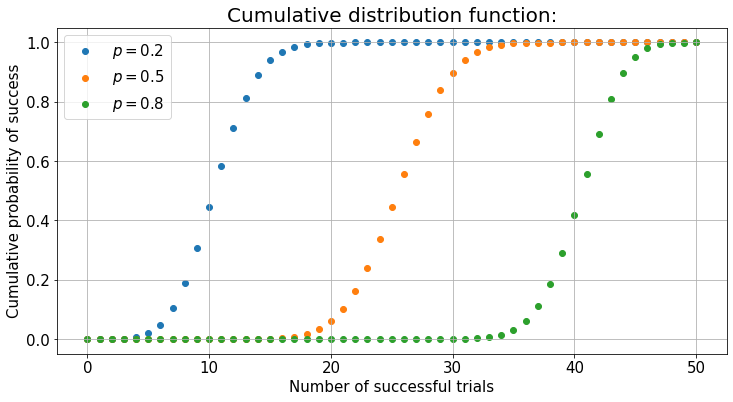

In [8]:
n = 50 # number of trials
probs = [0.2, 0.5, 0.8] # probabilities for each experiments' successful
x = np.arange(0, 51, 1) # range
plt.figure(figsize=(12,6))

def my_cdf(pmf):
    # do not use any library
    # given pmf return its cdf
    cdf = list(range(len(pmf)))
    for i in range(len(pmf)):
        cdf[i] = sum(pmf[:i]) # sum probabilities to calculate cdf
    return cdf
    
for prob in probs:
    # calculate PMF
    pmf = [binom.pmf(r,n,prob) for r in x]
    # calculate CDF
    cdf = my_cdf(pmf)
    plt.scatter(x, cdf)

    
plt.legend(["$p=0.2$","$p=0.5$","$p=0.8$"],fontsize=15)
plt.title("Cumulative distribution function:",fontsize=20)
plt.xlabel("Number of successful trials",fontsize=15)
plt.ylabel("Cumulative probability of success",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()


## Question 3

## Real World Problem
The possible locations of an endangered animal are determined and an evil zoo owner wants to track down this species. There are 19 detected locations and the possibility of each location to contain the animals is 0.05. However, the zoo owner is not sure whether that animal will be found in all determined locations. What is the probability that the animal could not be found in all of the locations? Find the approximate probability.

**Note:** Find the probablity with code!.

**Hint:** Use binomial distribution. Try with 20000 trials.

In [9]:
prob_each= 0.05 #Prob of each of the locs
loc_lst = list(range(1,20)) # List to store locations
count = 0 # Number of desired states
prb_lst = [prob_each for i in loc_lst] # Set same prob to each loc
for i in range(20000):
    check = True
    for j in loc_lst:
        k = random.choices([1,0], weights=[prob_each,1-prob_each], k=1)
        # For each location choose zero or one with given probabilities
        if k == [1]: # If 1 is selected, don't count this state
            check = False
    if check:
        count +=1
prob = count / 20000 # Calculate the probability by dividing the desired states by all states
print(prob)

0.3753


## Question 4

## Probability Integral Transform
Data values that are modeled as random variables from any continuous distribution can be modeled as a uniform distribution by using CDF. In this question, you are asked to obtain a uniform distribution from an exponential random variable.

**Hint:** Try with 100000 samples.

In [125]:
# Find the cdf of exponential rv
def exponential_cdf(x):
    cdf = 1 - np.exp(-x) 
    return cdf

# Plot both exponential random and obtained uniform distribution as histograms
def plot_uniform():
    # Generate 100000 random numbers from exponential distribution
    x = np.random.exponential(1, 100000)
    # Set size of graph
    plt.figure(figsize=(15,10))
    # Plot the histogram of the rvs
    plt.hist(x, bins=100, density=True)
    plt.title("exponential random variable histogram:",fontsize=20)
    plt.ylabel("Probability",fontsize=15)
    plt.figure(figsize=(15,10))
    # Plot the histogram cdf
    x_lst = np.linspace(0, 1, 100)
    n, bins, patches = plt.hist(x_lst,[exponential_cdf(x) for x in x_lst] ,density=True,cumulative=True,histtype='step')
    plt.title("Cumulative Distribution Function Histogram:",fontsize=20)
    plt.show()

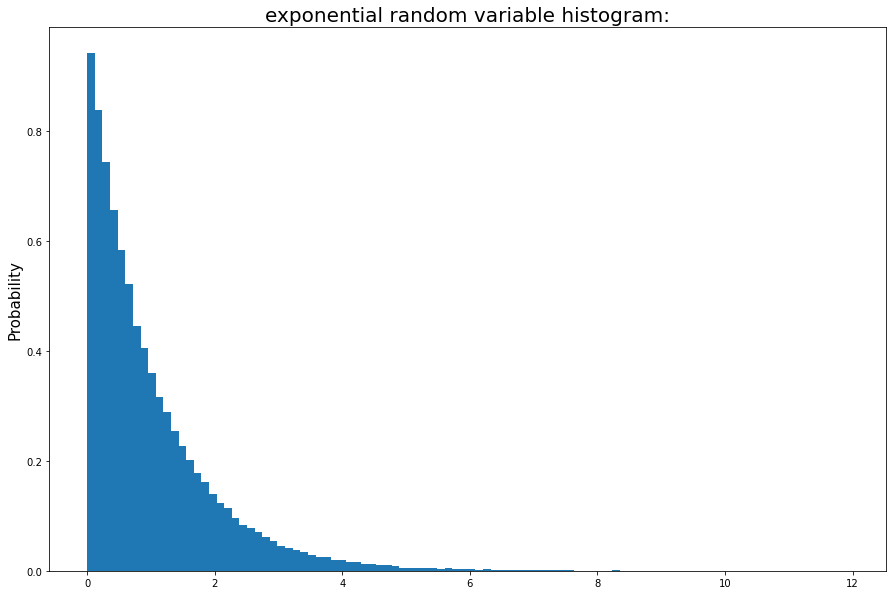

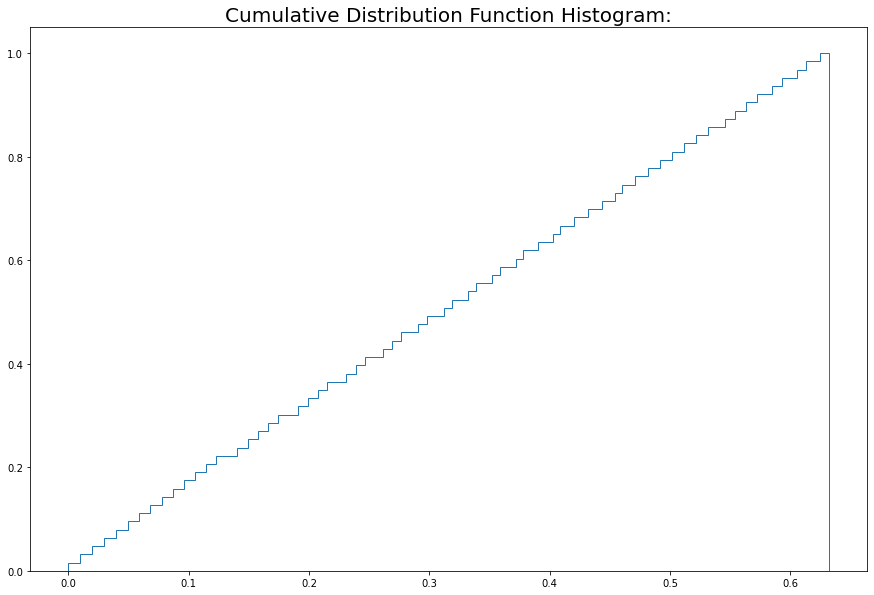

In [126]:
# Call the function
plot_uniform()